In [1]:
from bayes_point_model import BayesPointModel
import pandas as pd
from datetime import datetime
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
dataset = pd.read_csv('./dataset.csv')
dataset['start_date'] = pd.to_datetime(dataset['start_date'])

In [3]:
dataset.head()

,winner,loser,round,tournament_name,year,h2h,loser.1,loser_aces,loser_double_faults,loser_match,...,loser_first_serve_pct,loser_first_serve_won_pct,loser_return_points_won_pct,loser_second_serve_won_pct,loser_serve_points_won_pct,winner_first_serve_pct,winner_first_serve_won_pct,winner_return_points_won_pct,winner_second_serve_won_pct,winner_serve_points_won_pct
0,Robin Soderling,Ryan Harrison,R32,Brisbane,2011,H2H 2-0,Ryan Harrison,4.0,1.0,5980008.0,...,0.540000,0.592593,0.250000,0.521739,0.560000,0.615385,0.812500,0.440000,0.650000,0.750000
1,Michael Berrer,Dudi Sela,R32,Brisbane,2011,H2H 2-1,Dudi Sela,16.0,4.0,5980009.0,...,0.572816,0.711864,0.373737,0.454545,0.601942,0.545455,0.629630,0.398058,0.622222,0.626263
2,Matthew Ebden,John Millman,R32,Brisbane,2011,H2H 5-2,John Millman,4.0,3.0,5980010.0,...,0.763158,0.724138,0.352941,0.333333,0.631579,0.741176,0.730159,0.368421,0.409091,0.647059
3,Denis Istomin,Thiemo de Bakker,R32,Brisbane,2011,H2H 1-0,Thiemo de Bakker,10.0,1.0,5980011.0,...,0.597222,0.720930,0.222222,0.586207,0.666667,0.682540,0.767442,0.333333,0.800000,0.777778
4,Mardy Fish,Adrian Mannarino,R32,Brisbane,2011,H2H 1-0,Adrian Mannarino,1.0,6.0,5980012.0,...,0.544118,0.648649,0.235294,0.354839,0.514706,0.549020,0.821429,0.485294,0.695652,0.764706


In [4]:
# Load the model
# We will start the fit in April 2013 for speed.

start_date = datetime(2013, 4, 1)
bayes_model = BayesPointModel(start_date, dataset, period_length=6, 
                              store_posterior_dir='./saved_posteriors/')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9a1c0561df31b185a066f149ecadcd49 NOW.


In [5]:
# Predict an example match.
# This will actually fit the model; please allow some time for this (around 10-20 minutes).

prediction = bayes_model.predict_match('Novak Djokovic', 'Rafael Nadal', 'FO - RG', 'clay', datetime(2014, 6, 8), True)

Sampling from the posterior...
Extracting posterior samples...
Summarising posteriors...
Saving posterior samples...


In [6]:
# The prediction is a dictionary with the following keys:
prediction.keys()

['model_details', 'serve_probabilities', 'win_probabilities']

In [7]:
# Probabilities of winning the match:
prediction['win_probabilities']

{'Novak Djokovic': 0.4437612505395789, 'Rafael Nadal': 0.5562387494604211}

In [8]:
# Other information about the model:
prediction['model_details']

{'fit_every': 6,
 'fit_start': datetime.datetime(2013, 4, 1, 0, 0),
 'match_period': 3,
 'model': 'Surface Bayes',
 'p1_unknown': False,
 'p1_win_prob_std': 0.19929794028270753,
 'p2_unknown': False,
 'spw_stds': {'Novak Djokovic': 0.02398038355982038,
  'Rafael Nadal': 0.023527542580795594},
 'surface_unknown': False,
 'tournament_unknown': False}

/anaconda2/envs/jqas_test/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Serve probability posteriors')

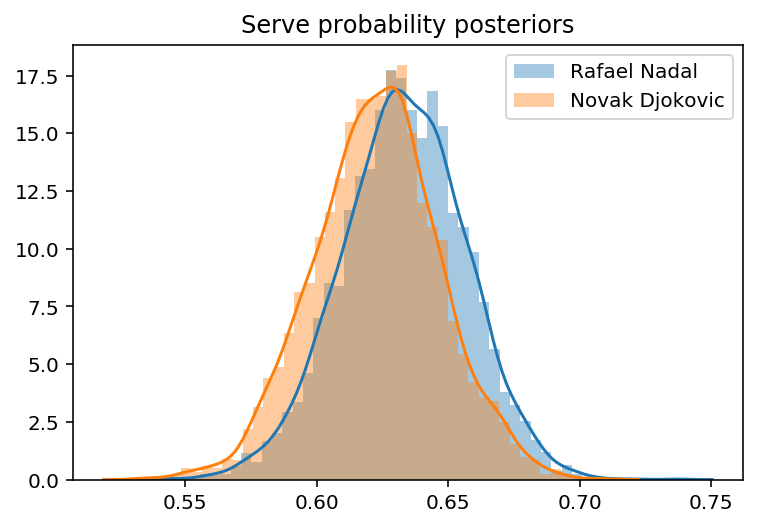

In [9]:
# We can also plot the posteriors of the serve-winning probabilities:

for player, spw in prediction['serve_probabilities'].items():
    sns.distplot(spw, label=player)
    
plt.legend()
plt.title('Serve probability posteriors')

In [10]:
# Since we specified the "store_posterior_dir", we can also look at the
# saved posteriors from the model fit.
import cPickle as pkl

stored = pkl.load(open('./saved_posteriors/2013-04-01T00:00:00_6_months_2014-04-01T00:00:00.pkl', 'rb'))

In [11]:
# A number of things are stored:
stored.keys()

['posteriors', 'model_info', 'fit_str']

In [12]:
# Check if everything converged OK:
print(stored['fit_str'])

Inference for Stan model: anon_model_9a1c0561df31b185a066f149ecadcd49.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                     mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
intercept            0.51  6.0e-4   0.02   0.47    0.5   0.51   0.52   0.55  950.0    1.0
sigma_s0             0.17  3.7e-4   0.01   0.15   0.16   0.17   0.18   0.19 1042.0    1.0
sigma_r0             0.13  3.8e-4   0.01   0.11   0.12   0.13   0.14   0.15  762.0   1.01
sigma_s              0.05  8.2e-4   0.02   0.01   0.04   0.05   0.06   0.08  387.0   1.01
sigma_r              0.05  6.1e-4   0.02 9.6e-3   0.04   0.05   0.06   0.07  656.0   1.01
sigma_surf            0.1  2.9e-4 7.8e-3   0.08   0.09    0.1    0.1   0.11  750.0    1.0
sigma_t              0.08  2.4e-4 8.3e-3   0.06   0.07   0.08   0.08    0.1 1235.0    1.0
eta_t[1]             0.92  7.2e-3   0.44   0.07   0.62   0.91   1.21   1.79 3712.0    1.0
e

In [13]:
# Look at a posterior
posteriors = stored['posteriors']
posteriors.keys()

['s', 'r', 'tournaments', 'surface', 'others']

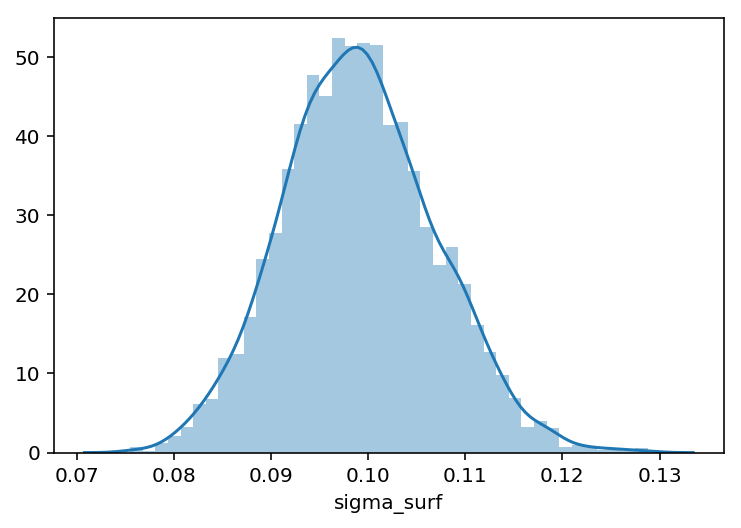

In [14]:
# We can look at the group level variance for surfaces, "sigma_surf":
sns.distplot(posteriors['others']['sigma_surf'])